In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from statistics import mean, stdev

In [2]:
sns.set_style('darkgrid')
cmap=sns.light_palette("seagreen",as_cmap=True)
pd.set_option('display.float_format','{:.4f}'.format)

In [3]:
unfair = pd.read_csv('titanic-result/unfair_lr-100.csv', index_col=0)
zhang = pd.read_csv('titanic-result/zhang-100.csv', index_col=0)
laftr = pd.read_csv('titanic-result/laftr-100.csv', index_col=0)
beutel = pd.read_csv('titanic-result/beutel-100.csv', index_col=0)

In [4]:
unfair

,model_name,cv_seed,clas_acc,dp,deqodds,deqopp,trade_dp,trade_deqodds,trade_deqopp,TN_a0,FP_a0,FN_a0,TP_a0,TN_a1,FP_a1,FN_a1,TP_a1
0,UnfairLR-decay,13,0.4180,0.9572,0.9590,0.9333,0.5819,0.5822,0.5774,0.0000,16.0000,5.0000,70.0000,2.0000,128.0000,0.0000,35.0000
1,UnfairLR-decay,29,0.3125,0.8789,0.9672,0.9565,0.4611,0.4724,0.4711,2.0000,23.0000,16.0000,45.0000,8.0000,130.0000,7.0000,25.0000
2,UnfairLR-decay,42,0.3672,0.9963,0.9870,0.9741,0.5366,0.5353,0.5333,0.0000,28.0000,1.0000,70.0000,0.0000,132.0000,1.0000,24.0000
3,UnfairLR-decay,55,0.3828,0.9997,0.9850,0.9844,0.5536,0.5513,0.5513,0.0000,20.0000,1.0000,63.0000,2.0000,137.0000,0.0000,33.0000
4,UnfairLR-decay,73,0.3750,0.9562,0.9843,0.9873,0.5387,0.5431,0.5436,1.0000,23.0000,6.0000,58.0000,3.0000,128.0000,3.0000,34.0000
5,UnfairLR,13,0.7148,0.5612,0.7036,0.5410,0.6288,0.7092,0.6159,13.0000,3.0000,32.0000,43.0000,123.0000,7.0000,31.0000,4.0000
6,UnfairLR,29,0.8008,0.4955,0.6838,0.5897,0.6122,0.7377,0.6792,18.0000,7.0000,15.0000,46.0000,130.0000,8.0000,21.0000,11.0000
7,UnfairLR,42,0.7539,0.5224,0.6505,0.6180,0.6172,0.6984,0.6792,17.0000,11.0000,24.0000,47.0000,122.0000,10.0000,18.0000,7.0000
8,UnfairLR,55,0.7539,0.5753,0.7358,0.5568,0.6526,0.7447,0.6405,17.0000,3.0000,24.0000,40.0000,130.0000,9.0000,27.0000,6.0000
9,UnfairLR,73,0.7930,0.4827,0.6771,0.5431,0.6001,0.7305,0.6447,18.0000,6.0000,14.0000,50.0000,123.0000,8.0000,25.0000,12.0000


In [5]:
zhang

,model_name,cv_seed,clas_acc,dp,deqodds,deqopp,trade_dp,trade_deqodds,trade_deqopp,TN_a0,FP_a0,FN_a0,TP_a0,TN_a1,FP_a1,FN_a1,TP_a1
0,Zhang4DP,13,0.7227,0.5320,0.6609,0.5410,0.6128,0.6904,0.6187,12.0000,4.0000,32.0000,43.0000,126.0000,4.0000,31.0000,4.0000
1,Zhang4DP,29,0.8047,0.4486,0.6179,0.4795,0.5760,0.6990,0.6009,18.0000,7.0000,14.0000,47.0000,133.0000,5.0000,24.0000,8.0000
2,Zhang4DP,42,0.7539,0.5246,0.6343,0.5803,0.6187,0.6889,0.6558,18.0000,10.0000,27.0000,44.0000,126.0000,6.0000,20.0000,5.0000
3,Zhang4DP,55,0.7617,0.5338,0.6916,0.5256,0.6277,0.7249,0.6220,16.0000,4.0000,22.0000,42.0000,131.0000,8.0000,27.0000,6.0000
4,Zhang4DP,73,0.7930,0.4015,0.5678,0.4307,0.5331,0.6617,0.5582,16.0000,8.0000,12.0000,52.0000,126.0000,5.0000,28.0000,9.0000
5,Zhang4EqOdds,13,0.7227,0.5320,0.6609,0.5410,0.6128,0.6904,0.6187,12.0000,4.0000,32.0000,43.0000,126.0000,4.0000,31.0000,4.0000
6,Zhang4EqOdds,29,0.8047,0.4486,0.6179,0.4795,0.5760,0.6990,0.6009,18.0000,7.0000,14.0000,47.0000,133.0000,5.0000,24.0000,8.0000
7,Zhang4EqOdds,42,0.7500,0.5310,0.6381,0.5803,0.6218,0.6895,0.6543,18.0000,10.0000,27.0000,44.0000,125.0000,7.0000,20.0000,5.0000
8,Zhang4EqOdds,55,0.7578,0.5219,0.6666,0.5256,0.6181,0.7093,0.6207,15.0000,5.0000,22.0000,42.0000,131.0000,8.0000,27.0000,6.0000
9,Zhang4EqOdds,73,0.7930,0.4015,0.5678,0.4307,0.5331,0.6617,0.5582,16.0000,8.0000,12.0000,52.0000,126.0000,5.0000,28.0000,9.0000


In [6]:
laftr

,model_name,cv_seed,fair_coeff,clas_acc,dp,deqodds,deqopp,trade_dp,trade_deqodds,trade_deqopp,TN_a0,FP_a0,FN_a0,TP_a0,TN_a1,FP_a1,FN_a1,TP_a1
0,LAFTR4DP,13,0.2000,0.7383,0.5191,0.6655,0.6762,0.6096,0.7000,0.7059,9.0000,7.0000,25.0000,50.0000,118.0000,12.0000,23.0000,12.0000
1,LAFTR4DP,13,0.5000,0.7266,0.6839,0.8832,0.7962,0.7046,0.7973,0.7598,15.0000,1.0000,34.0000,41.0000,118.0000,12.0000,23.0000,12.0000
2,LAFTR4DP,13,0.7000,0.7266,0.6960,0.8936,0.8248,0.7110,0.8015,0.7726,15.0000,1.0000,34.0000,41.0000,117.0000,13.0000,22.0000,13.0000
3,LAFTR4DP,13,1.0000,0.7109,0.7032,0.9114,0.8248,0.7071,0.7988,0.7636,14.0000,2.0000,34.0000,41.0000,114.0000,16.0000,22.0000,13.0000
4,LAFTR4DP,29,0.2000,0.7891,0.5372,0.7536,0.6967,0.6392,0.7709,0.7400,17.0000,8.0000,12.0000,49.0000,120.0000,18.0000,16.0000,16.0000
5,LAFTR4DP,29,0.5000,0.7617,0.6596,0.8729,0.8263,0.7070,0.8135,0.7927,19.0000,6.0000,18.0000,43.0000,116.0000,22.0000,15.0000,17.0000
6,LAFTR4DP,29,0.7000,0.7344,0.7468,0.9346,0.9098,0.7405,0.8225,0.8127,20.0000,5.0000,25.0000,36.0000,116.0000,22.0000,16.0000,16.0000
7,LAFTR4DP,29,1.0000,0.7422,0.7528,0.9613,0.9559,0.7475,0.8377,0.8356,20.0000,5.0000,24.0000,37.0000,115.0000,23.0000,14.0000,18.0000
8,LAFTR4DP,42,0.2000,0.7305,0.6041,0.7672,0.8039,0.6613,0.7484,0.7654,16.0000,12.0000,23.0000,48.0000,111.0000,21.0000,13.0000,12.0000
9,LAFTR4DP,42,0.5000,0.7031,0.7370,0.9053,0.9425,0.7197,0.7915,0.8054,19.0000,9.0000,30.0000,41.0000,107.0000,25.0000,12.0000,13.0000


In [7]:
beutel

,model_name,cv_seed,fair_coeff,clas_acc,dp,deqodds,deqopp,trade_dp,trade_deqodds,trade_deqopp,TN_a0,FP_a0,FN_a0,TP_a0,TN_a1,FP_a1,FN_a1,TP_a1
0,BEUTEL4DP,13,1.0000,0.4258,0.6236,0.4996,0.5810,0.5061,0.4598,0.4914,13.0000,3.0000,40.0000,35.0000,30.0000,100.0000,4.0000,31.0000
1,BEUTEL4DP,29,1.0000,0.5195,0.9070,0.9165,0.8458,0.6606,0.6632,0.6437,12.0000,13.0000,23.0000,38.0000,68.0000,70.0000,17.0000,15.0000
2,BEUTEL4DP,42,1.0000,0.4375,0.6061,0.5223,0.6344,0.5082,0.4761,0.5179,25.0000,3.0000,43.0000,28.0000,40.0000,92.0000,6.0000,19.0000
3,BEUTEL4DP,55,1.0000,0.4961,0.9823,0.9656,0.9848,0.6592,0.6554,0.6598,9.0000,11.0000,32.0000,32.0000,70.0000,69.0000,17.0000,16.0000
4,BEUTEL4DP,73,1.0000,0.4805,0.9870,0.9271,0.9155,0.6463,0.6329,0.6302,11.0000,13.0000,24.0000,40.0000,52.0000,79.0000,17.0000,20.0000


## Acc mean and std

In [8]:
unfair_acc = unfair.groupby(['model_name'])['clas_acc'].agg([mean, stdev])
zhang_acc = zhang.groupby(['model_name'])['clas_acc'].agg([mean, stdev])
laftr_acc = laftr.groupby(['model_name', 'fair_coeff'])['clas_acc'].agg([mean, stdev])
beutel_acc = beutel.groupby(['model_name'])['clas_acc'].agg([mean, stdev])

In [9]:
acc = pd.concat([unfair_acc, zhang_acc, laftr_acc, beutel_acc])
acc = acc.reset_index()
acc = acc.rename(columns={'index': 'model_name'})
acc

,model_name,mean,stdev
0,UnfairLR,0.7633,0.0347
1,UnfairLR-decay,0.3711,0.0381
2,Zhang4DP,0.7672,0.0326
3,Zhang4EqOdds,0.7656,0.0333
4,Zhang4EqOpp,0.7664,0.0293
5,"(LAFTR4DP, 0.2)",0.7562,0.0256
6,"(LAFTR4DP, 0.5)",0.7305,0.0236
7,"(LAFTR4DP, 0.7)",0.7172,0.0176
8,"(LAFTR4DP, 1.0)",0.7203,0.0239
9,"(LAFTR4EqOdds, 0.2)",0.7547,0.0354


In [10]:
names = acc['model_name'].to_list()
for i in range(len(names)):
    if isinstance(names[i], tuple):
        names[i] = '-'.join([str(value) for value in names[i]])

names

['UnfairLR',
 'UnfairLR-decay',
 'Zhang4DP',
 'Zhang4EqOdds',
 'Zhang4EqOpp',
 'LAFTR4DP-0.2',
 'LAFTR4DP-0.5',
 'LAFTR4DP-0.7',
 'LAFTR4DP-1.0',
 'LAFTR4EqOdds-0.2',
 'LAFTR4EqOdds-0.5',
 'LAFTR4EqOdds-0.7',
 'LAFTR4EqOdds-1.0',
 'LAFTR4EqOpp-0.2',
 'LAFTR4EqOpp-0.5',
 'LAFTR4EqOpp-0.7',
 'LAFTR4EqOpp-1.0',
 'BEUTEL4DP']

In [11]:
acc['model_name'] = names
acc

,model_name,mean,stdev
0,UnfairLR,0.7633,0.0347
1,UnfairLR-decay,0.3711,0.0381
2,Zhang4DP,0.7672,0.0326
3,Zhang4EqOdds,0.7656,0.0333
4,Zhang4EqOpp,0.7664,0.0293
5,LAFTR4DP-0.2,0.7562,0.0256
6,LAFTR4DP-0.5,0.7305,0.0236
7,LAFTR4DP-0.7,0.7172,0.0176
8,LAFTR4DP-1.0,0.7203,0.0239
9,LAFTR4EqOdds-0.2,0.7547,0.0354


In [12]:
print((acc['mean'].round(4).astype(str) + ' $\pm$ ' + acc['stdev'].round(4).astype(str)).to_string(index=False))

 0.7633 $\pm$ 0.0347
 0.3711 $\pm$ 0.0381
 0.7672 $\pm$ 0.0326
 0.7656 $\pm$ 0.0333
 0.7664 $\pm$ 0.0293
 0.7562 $\pm$ 0.0256
 0.7305 $\pm$ 0.0236
 0.7172 $\pm$ 0.0176
 0.7203 $\pm$ 0.0239
 0.7547 $\pm$ 0.0354
 0.7547 $\pm$ 0.0354
 0.7547 $\pm$ 0.0354
 0.7547 $\pm$ 0.0354
  0.707 $\pm$ 0.0311
  0.707 $\pm$ 0.0311
  0.707 $\pm$ 0.0311
  0.707 $\pm$ 0.0311
 0.4719 $\pm$ 0.0395


## Fairness mean and std

In [13]:
unfair_dp = unfair.groupby(['model_name'])['dp'].agg([mean, stdev])
zhang_dp = zhang.groupby(['model_name'])['dp'].agg([mean, stdev])
laftr_dp = laftr.groupby(['model_name', 'fair_coeff'])['dp'].agg([mean, stdev])
beutel_dp = beutel.groupby(['model_name'])['dp'].agg([mean, stdev])

In [14]:
dp = pd.concat([unfair_dp, zhang_dp, laftr_dp, beutel_dp])
dp = dp.reset_index()
dp = dp.rename(columns={'index': 'model_name'})
dp['model_name'] = names
dp

,model_name,mean,stdev
0,UnfairLR,0.5274,0.0402
1,UnfairLR-decay,0.9577,0.0486
2,Zhang4DP,0.4881,0.0600
3,Zhang4EqOdds,0.4870,0.0591
4,Zhang4EqOpp,0.4665,0.0644
5,LAFTR4DP-0.2,0.5483,0.0331
6,LAFTR4DP-0.5,0.6744,0.0390
7,LAFTR4DP-0.7,0.7218,0.0266
8,LAFTR4DP-1.0,0.7068,0.0445
9,LAFTR4EqOdds-0.2,0.5455,0.1079


In [15]:
print((dp['mean'].round(4).astype(str) + ' $\pm$ ' + dp['stdev'].round(4).astype(str)).to_string(index=False))

 0.5274 $\pm$ 0.0402
 0.9577 $\pm$ 0.0486
   0.4881 $\pm$ 0.06
  0.487 $\pm$ 0.0591
 0.4665 $\pm$ 0.0644
 0.5483 $\pm$ 0.0331
  0.6744 $\pm$ 0.039
 0.7218 $\pm$ 0.0266
 0.7068 $\pm$ 0.0445
 0.5455 $\pm$ 0.1079
 0.5455 $\pm$ 0.1079
 0.5455 $\pm$ 0.1079
 0.5455 $\pm$ 0.1079
 0.7173 $\pm$ 0.0792
 0.7173 $\pm$ 0.0792
 0.7173 $\pm$ 0.0792
 0.7173 $\pm$ 0.0792
 0.8212 $\pm$ 0.1911


In [16]:
unfair_deqodds = unfair.groupby(['model_name'])['deqodds'].agg([mean, stdev])
zhang_deqodds = zhang.groupby(['model_name'])['deqodds'].agg([mean, stdev])
laftr_deqodds = laftr.groupby(['model_name', 'fair_coeff'])['deqodds'].agg([mean, stdev])
beutel_deqodds = beutel.groupby(['model_name'])['deqodds'].agg([mean, stdev])

In [17]:
deqodds = pd.concat([unfair_deqodds, zhang_deqodds, laftr_deqodds, beutel_deqodds])
deqodds = deqodds.reset_index()
deqodds = deqodds.rename(columns={'index': 'model_name'})
deqodds['model_name'] = names
deqodds

,model_name,mean,stdev
0,UnfairLR,0.6902,0.0318
1,UnfairLR-decay,0.9765,0.0126
2,Zhang4DP,0.6345,0.0466
3,Zhang4EqOdds,0.6302,0.0399
4,Zhang4EqOpp,0.6081,0.0599
5,LAFTR4DP-0.2,0.7243,0.0404
6,LAFTR4DP-0.5,0.8572,0.0431
7,LAFTR4DP-0.7,0.8956,0.0331
8,LAFTR4DP-1.0,0.8924,0.0471
9,LAFTR4EqOdds-0.2,0.7311,0.0942


In [18]:
print((deqodds['mean'].round(4).astype(str) + ' $\pm$ ' + deqodds['stdev'].round(4).astype(str)).to_string(index=False))

 0.6902 $\pm$ 0.0318
 0.9765 $\pm$ 0.0126
 0.6345 $\pm$ 0.0466
 0.6302 $\pm$ 0.0399
 0.6081 $\pm$ 0.0599
 0.7243 $\pm$ 0.0404
 0.8572 $\pm$ 0.0431
 0.8956 $\pm$ 0.0331
 0.8924 $\pm$ 0.0471
 0.7311 $\pm$ 0.0942
 0.7311 $\pm$ 0.0942
 0.7311 $\pm$ 0.0942
 0.7311 $\pm$ 0.0942
 0.8706 $\pm$ 0.0706
 0.8706 $\pm$ 0.0706
 0.8706 $\pm$ 0.0706
 0.8706 $\pm$ 0.0706
 0.7662 $\pm$ 0.2339


In [19]:
unfair_deqopp = unfair.groupby(['model_name'])['deqopp'].agg([mean, stdev])
zhang_deqopp = zhang.groupby(['model_name'])['deqopp'].agg([mean, stdev])
laftr_deqopp = laftr.groupby(['model_name', 'fair_coeff'])['deqopp'].agg([mean, stdev])
beutel_deqopp = beutel.groupby(['model_name'])['deqopp'].agg([mean, stdev])

In [20]:
deqopp = pd.concat([unfair_deqopp, zhang_deqopp, laftr_deqopp, beutel_deqopp])
deqopp = deqopp.reset_index()
deqopp = deqopp.rename(columns={'index': 'model_name'})
deqopp['model_name'] = names
deqopp

,model_name,mean,stdev
0,UnfairLR,0.5697,0.0333
1,UnfairLR-decay,0.9671,0.0224
2,Zhang4DP,0.5114,0.0578
3,Zhang4EqOdds,0.5114,0.0578
4,Zhang4EqOpp,0.4954,0.0446
5,LAFTR4DP-0.2,0.7002,0.0608
6,LAFTR4DP-0.5,0.8205,0.0729
7,LAFTR4DP-0.7,0.8680,0.0585
8,LAFTR4DP-1.0,0.8497,0.0634
9,LAFTR4EqOdds-0.2,0.6834,0.1098


In [21]:
print((deqopp['mean'].round(4).astype(str) + ' $\pm$ ' + deqopp['stdev'].round(4).astype(str)).to_string(index=False))

 0.5697 $\pm$ 0.0333
 0.9671 $\pm$ 0.0224
 0.5114 $\pm$ 0.0578
 0.5114 $\pm$ 0.0578
 0.4954 $\pm$ 0.0446
 0.7002 $\pm$ 0.0608
 0.8205 $\pm$ 0.0729
  0.868 $\pm$ 0.0585
 0.8497 $\pm$ 0.0634
 0.6834 $\pm$ 0.1098
 0.6834 $\pm$ 0.1098
 0.6834 $\pm$ 0.1098
 0.6834 $\pm$ 0.1098
 0.8378 $\pm$ 0.0844
 0.8378 $\pm$ 0.0844
 0.8378 $\pm$ 0.0844
 0.8378 $\pm$ 0.0844
 0.7923 $\pm$ 0.1766


## Trade-offs mean and std

In [22]:
unfair_trade_dp = unfair.groupby(['model_name'])['trade_dp'].agg([mean, stdev])
zhang_trade_dp = zhang.groupby(['model_name'])['trade_dp'].agg([mean, stdev])
laftr_trade_dp = laftr.groupby(['model_name', 'fair_coeff'])['trade_dp'].agg([mean, stdev])
beutel_trade_dp = beutel.groupby(['model_name'])['trade_dp'].agg([mean, stdev])

In [23]:
trade_dp = pd.concat([unfair_trade_dp, zhang_trade_dp, laftr_trade_dp, beutel_trade_dp])
trade_dp = trade_dp.reset_index()
trade_dp = trade_dp.rename(columns={'index': 'model_name'})
trade_dp['model_name'] = names
trade_dp

,model_name,mean,stdev
0,UnfairLR,0.6222,0.0199
1,UnfairLR-decay,0.5344,0.0448
2,Zhang4DP,0.5937,0.0392
3,Zhang4EqOdds,0.5924,0.0378
4,Zhang4EqOpp,0.5767,0.0429
5,LAFTR4DP-0.2,0.6349,0.0185
6,LAFTR4DP-0.5,0.7004,0.0149
7,LAFTR4DP-0.7,0.7191,0.0141
8,LAFTR4DP-1.0,0.7126,0.0217
9,LAFTR4EqOdds-0.2,0.6261,0.0614


In [24]:
print((trade_dp['mean'].round(4).astype(str) + ' $\pm$ ' + trade_dp['stdev'].round(4).astype(str)).to_string(index=False))

 0.6222 $\pm$ 0.0199
 0.5344 $\pm$ 0.0448
 0.5937 $\pm$ 0.0392
 0.5924 $\pm$ 0.0378
 0.5767 $\pm$ 0.0429
 0.6349 $\pm$ 0.0185
 0.7004 $\pm$ 0.0149
 0.7191 $\pm$ 0.0141
 0.7126 $\pm$ 0.0217
 0.6261 $\pm$ 0.0614
 0.6261 $\pm$ 0.0614
 0.6261 $\pm$ 0.0614
 0.6261 $\pm$ 0.0614
 0.7091 $\pm$ 0.0321
 0.7091 $\pm$ 0.0321
 0.7091 $\pm$ 0.0321
 0.7091 $\pm$ 0.0321
 0.5961 $\pm$ 0.0814


In [25]:
unfair_trade_deqodds = unfair.groupby(['model_name'])['trade_deqodds'].agg([mean, stdev])
zhang_trade_deqodds = zhang.groupby(['model_name'])['trade_deqodds'].agg([mean, stdev])
laftr_trade_deqodds = laftr.groupby(['model_name', 'fair_coeff'])['trade_deqodds'].agg([mean, stdev])
beutel_trade_deqodds = beutel.groupby(['model_name'])['trade_deqodds'].agg([mean, stdev])

In [26]:
trade_deqodds = pd.concat([unfair_trade_deqodds, zhang_trade_deqodds, laftr_trade_deqodds, beutel_trade_deqodds])
trade_deqodds = trade_deqodds.reset_index()
trade_deqodds = trade_deqodds.rename(columns={'index': 'model_name'})
trade_deqodds['model_name'] = names
trade_deqodds

,model_name,mean,stdev
0,UnfairLR,0.7241,0.0196
1,UnfairLR-decay,0.5369,0.0402
2,Zhang4DP,0.6930,0.0227
3,Zhang4EqOdds,0.6900,0.0177
4,Zhang4EqOpp,0.6757,0.0266
5,LAFTR4DP-0.2,0.7395,0.0274
6,LAFTR4DP-0.5,0.7882,0.0212
7,LAFTR4DP-0.7,0.7963,0.0197
8,LAFTR4DP-1.0,0.7966,0.0256
9,LAFTR4EqOdds-0.2,0.7384,0.0406


In [27]:
print((trade_deqodds['mean'].round(4).astype(str) + ' $\pm$ ' + trade_deqodds['stdev'].round(4).astype(str)).to_string(index=False))

 0.7241 $\pm$ 0.0196
 0.5369 $\pm$ 0.0402
  0.693 $\pm$ 0.0227
   0.69 $\pm$ 0.0177
 0.6757 $\pm$ 0.0266
 0.7395 $\pm$ 0.0274
 0.7882 $\pm$ 0.0212
 0.7963 $\pm$ 0.0197
 0.7966 $\pm$ 0.0256
 0.7384 $\pm$ 0.0406
 0.7384 $\pm$ 0.0406
 0.7384 $\pm$ 0.0406
 0.7384 $\pm$ 0.0406
   0.7788 $\pm$ 0.03
   0.7788 $\pm$ 0.03
   0.7788 $\pm$ 0.03
   0.7788 $\pm$ 0.03
 0.5775 $\pm$ 0.1008


In [28]:
unfair_trade_deqopp = unfair.groupby(['model_name'])['trade_deqopp'].agg([mean, stdev])
zhang_trade_deqopp = zhang.groupby(['model_name'])['trade_deqopp'].agg([mean, stdev])
laftr_trade_deqopp = laftr.groupby(['model_name', 'fair_coeff'])['trade_deqopp'].agg([mean, stdev])
beutel_trade_deqopp = beutel.groupby(['model_name'])['trade_deqopp'].agg([mean, stdev])

In [29]:
trade_deqopp = pd.concat([unfair_trade_deqopp, zhang_trade_deqopp, laftr_trade_deqopp, beutel_trade_deqopp])
trade_deqopp = trade_deqopp.reset_index()
trade_deqopp = trade_deqopp.rename(columns={'index': 'model_name'})
trade_deqopp['model_name'] = names
trade_deqopp

,model_name,mean,stdev
0,UnfairLR,0.6519,0.0273
1,UnfairLR-decay,0.5353,0.0394
2,Zhang4DP,0.6111,0.0356
3,Zhang4EqOdds,0.6106,0.0350
4,Zhang4EqOpp,0.6002,0.0306
5,LAFTR4DP-0.2,0.7256,0.0287
6,LAFTR4DP-0.5,0.7712,0.0283
7,LAFTR4DP-0.7,0.7848,0.0287
8,LAFTR4DP-1.0,0.7793,0.0379
9,LAFTR4EqOdds-0.2,0.7116,0.0595


In [30]:
print((trade_deqopp['mean'].round(4).astype(str) + ' $\pm$ ' + trade_deqopp['stdev'].round(4).astype(str)).to_string(index=False))

 0.6519 $\pm$ 0.0273
 0.5353 $\pm$ 0.0394
 0.6111 $\pm$ 0.0356
  0.6106 $\pm$ 0.035
 0.6002 $\pm$ 0.0306
 0.7256 $\pm$ 0.0287
 0.7712 $\pm$ 0.0283
 0.7848 $\pm$ 0.0287
 0.7793 $\pm$ 0.0379
 0.7116 $\pm$ 0.0595
 0.7116 $\pm$ 0.0595
 0.7116 $\pm$ 0.0595
 0.7116 $\pm$ 0.0595
 0.7651 $\pm$ 0.0399
 0.7651 $\pm$ 0.0399
 0.7651 $\pm$ 0.0399
 0.7651 $\pm$ 0.0399
 0.5886 $\pm$ 0.0779


## t-test

In [31]:
unfair_lr, unfair_lr_decay = [x for _, x in unfair.groupby(['model_name'])]
zhang4dp, zhang4deqodds, zhang4deqopp = [x for _, x in zhang.groupby(['model_name'])]
(
    laftr4dp_02, laftr4dp_05, laftr4dp_07, laftr4dp_1, 
    laftr4deqodds_02, laftr4deqodds_05, laftr4deqodds_07, laftr4deqodds_1, 
    laftr4deqopp_02, laftr4deqopp_05, laftr4deqopp_07, laftr4deqopp_1
) = [x for _, x in laftr.groupby(['model_name', 'fair_coeff'])]
beutel4dp = [x for _, x in beutel.groupby(['model_name'])][0]

In [32]:
models = [
    unfair_lr, unfair_lr_decay,
    zhang4dp, zhang4deqodds, zhang4deqopp,
    laftr4dp_02, laftr4dp_05, laftr4dp_07, laftr4dp_1, 
    laftr4deqodds_02, laftr4deqodds_05, laftr4deqodds_07, laftr4deqodds_1, 
    laftr4deqopp_02, laftr4deqopp_05, laftr4deqopp_07, laftr4deqopp_1,
    beutel4dp
]

In [33]:
alpha = 0.05 # significance level
confidence = 1 - alpha # confidence level
l = len(models)

In [34]:
base_df = pd.DataFrame(index=names, columns=names, dtype=object)

### for accuracies

In [35]:
res_acc = base_df.copy()
for i in range(0, l-1):
    for j in range(i+1, l):
        stat = stats.ttest_rel(models[i]['clas_acc'], models[j]['clas_acc'])
        res_acc.iloc[i, j] = stat[1]

In [36]:
res_acc.values[[np.arange(res_acc.shape[0])]*2] = '-'
res_acc.T.fillna('')

<ipython-input-36-f271aa6f61ae>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res_acc.values[[np.arange(res_acc.shape[0])]*2] = '-'


,UnfairLR,UnfairLR-decay,Zhang4DP,Zhang4EqOdds,Zhang4EqOpp,LAFTR4DP-0.2,LAFTR4DP-0.5,LAFTR4DP-0.7,LAFTR4DP-1.0,LAFTR4EqOdds-0.2,LAFTR4EqOdds-0.5,LAFTR4EqOdds-0.7,LAFTR4EqOdds-1.0,LAFTR4EqOpp-0.2,LAFTR4EqOpp-0.5,LAFTR4EqOpp-0.7,LAFTR4EqOpp-1.0,BEUTEL4DP
UnfairLR,-,,,,,,,,,,,,,,,,,
UnfairLR-decay,0.0002,-,,,,,,,,,,,,,,,,
Zhang4DP,0.0890,0.0002,-,,,,,,,,,,,,,,,
Zhang4EqOdds,0.3046,0.0002,0.1778,-,,,,,,,,,,,,,,
Zhang4EqOpp,0.5122,0.0002,0.8605,0.8712,-,,,,,,,,,,,,,
LAFTR4DP-0.2,0.4314,0.0001,0.1836,0.2151,0.2563,-,,,,,,,,,,,,
LAFTR4DP-0.5,0.0447,0.0001,0.0230,0.0231,0.0239,0.0021,-,,,,,,,,,,,
LAFTR4DP-0.7,0.0364,0.0001,0.0242,0.0256,0.0173,0.0122,0.1055,-,,,,,,,,,,
LAFTR4DP-1.0,0.0234,0.0001,0.0176,0.0189,0.0086,0.0217,0.3321,0.6541,-,,,,,,,,,
LAFTR4EqOdds-0.2,0.5724,0.0002,0.4336,0.4766,0.4028,0.9057,0.1082,0.0200,0.0032,-,,,,,,,,


### for fairness

In [37]:
res_dp = base_df.copy()
for i in range(0, l-1):
    for j in range(i+1, l):
        stat = stats.ttest_rel(models[i]['dp'], models[j]['dp'])
        res_dp.iloc[i, j] = stat[1]

In [38]:
res_dp.values[[np.arange(res_dp.shape[0])]*2] = '-'
res_dp.T.fillna('')

<ipython-input-38-5ab64d67172f>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res_dp.values[[np.arange(res_dp.shape[0])]*2] = '-'


,UnfairLR,UnfairLR-decay,Zhang4DP,Zhang4EqOdds,Zhang4EqOpp,LAFTR4DP-0.2,LAFTR4DP-0.5,LAFTR4DP-0.7,LAFTR4DP-1.0,LAFTR4EqOdds-0.2,LAFTR4EqOdds-0.5,LAFTR4EqOdds-0.7,LAFTR4EqOdds-1.0,LAFTR4EqOpp-0.2,LAFTR4EqOpp-0.5,LAFTR4EqOpp-0.7,LAFTR4EqOpp-1.0,BEUTEL4DP
UnfairLR,-,,,,,,,,,,,,,,,,,
UnfairLR-decay,0.0000,-,,,,,,,,,,,,,,,,
Zhang4DP,0.0435,0.0000,-,,,,,,,,,,,,,,,
Zhang4EqOdds,0.0526,0.0000,0.7281,-,,,,,,,,,,,,,,
Zhang4EqOpp,0.0117,0.0000,0.0909,0.1241,-,,,,,,,,,,,,,
LAFTR4DP-0.2,0.4233,0.0000,0.0800,0.0680,0.0564,-,,,,,,,,,,,,
LAFTR4DP-0.5,0.0027,0.0002,0.0009,0.0006,0.0012,0.0003,-,,,,,,,,,,,
LAFTR4DP-0.7,0.0009,0.0008,0.0009,0.0008,0.0014,0.0001,0.0383,-,,,,,,,,,,
LAFTR4DP-1.0,0.0012,0.0020,0.0022,0.0025,0.0023,0.0058,0.3693,0.5010,-,,,,,,,,,
LAFTR4EqOdds-0.2,0.6232,0.0008,0.1445,0.1637,0.0926,0.9559,0.0580,0.0177,0.0143,-,,,,,,,,


In [39]:
res_deqodds = base_df.copy()
for i in range(0, l-1):
    for j in range(i+1, l):
        stat = stats.ttest_rel(models[i]['deqodds'], models[j]['deqodds'])
        res_deqodds.iloc[i, j] = stat[1]

In [40]:
res_deqodds.values[[np.arange(res_deqodds.shape[0])]*2] = '-'
res_deqodds.T.fillna('')

<ipython-input-40-950da47788eb>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res_deqodds.values[[np.arange(res_deqodds.shape[0])]*2] = '-'


,UnfairLR,UnfairLR-decay,Zhang4DP,Zhang4EqOdds,Zhang4EqOpp,LAFTR4DP-0.2,LAFTR4DP-0.5,LAFTR4DP-0.7,LAFTR4DP-1.0,LAFTR4EqOdds-0.2,LAFTR4EqOdds-0.5,LAFTR4EqOdds-0.7,LAFTR4EqOdds-1.0,LAFTR4EqOpp-0.2,LAFTR4EqOpp-0.5,LAFTR4EqOpp-0.7,LAFTR4EqOpp-1.0,BEUTEL4DP
UnfairLR,-,,,,,,,,,,,,,,,,,
UnfairLR-decay,0.0001,-,,,,,,,,,,,,,,,,
Zhang4DP,0.0232,0.0001,-,,,,,,,,,,,,,,,
Zhang4EqOdds,0.0200,0.0001,0.4636,-,,,,,,,,,,,,,,
Zhang4EqOpp,0.0238,0.0002,0.1517,0.1848,-,,,,,,,,,,,,,
LAFTR4DP-0.2,0.3165,0.0001,0.0543,0.0368,0.0504,-,,,,,,,,,,,,
LAFTR4DP-0.5,0.0055,0.0057,0.0015,0.0007,0.0012,0.0042,-,,,,,,,,,,,
LAFTR4DP-0.7,0.0013,0.0099,0.0005,0.0002,0.0008,0.0005,0.0239,-,,,,,,,,,,
LAFTR4DP-1.0,0.0006,0.0304,0.0008,0.0005,0.0011,0.0052,0.2789,0.8849,-,,,,,,,,,
LAFTR4EqOdds-0.2,0.3066,0.0050,0.0140,0.0187,0.0162,0.8989,0.0528,0.0174,0.0164,-,,,,,,,,


In [41]:
res_deqopp = base_df.copy()
for i in range(0, l-1):
    for j in range(i+1, l):
        stat = stats.ttest_rel(models[i]['deqopp'], models[j]['deqopp'])
        res_deqopp.iloc[i, j] = stat[1]

In [42]:
res_deqopp.values[[np.arange(res_deqopp.shape[0])]*2] = '-'
res_deqopp.T.fillna('')

<ipython-input-42-970c353c1324>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res_deqopp.values[[np.arange(res_deqopp.shape[0])]*2] = '-'


,UnfairLR,UnfairLR-decay,Zhang4DP,Zhang4EqOdds,Zhang4EqOpp,LAFTR4DP-0.2,LAFTR4DP-0.5,LAFTR4DP-0.7,LAFTR4DP-1.0,LAFTR4EqOdds-0.2,LAFTR4EqOdds-0.5,LAFTR4EqOdds-0.7,LAFTR4EqOdds-1.0,LAFTR4EqOpp-0.2,LAFTR4EqOpp-0.5,LAFTR4EqOpp-0.7,LAFTR4EqOpp-1.0,BEUTEL4DP
UnfairLR,-,,,,,,,,,,,,,,,,,
UnfairLR-decay,0.0000,-,,,,,,,,,,,,,,,,
Zhang4DP,0.0609,0.0001,-,,,,,,,,,,,,,,,
Zhang4EqOdds,0.0609,0.0001,,-,,,,,,,,,,,,,,
Zhang4EqOpp,0.0274,0.0001,0.3298,0.3298,-,,,,,,,,,,,,,
LAFTR4DP-0.2,0.0014,0.0007,0.0018,0.0018,0.0033,-,,,,,,,,,,,,
LAFTR4DP-0.5,0.0003,0.0132,0.0004,0.0004,0.0008,0.0000,-,,,,,,,,,,,
LAFTR4DP-0.7,0.0000,0.0228,0.0005,0.0005,0.0005,0.0002,0.0382,-,,,,,,,,,,
LAFTR4DP-1.0,0.0004,0.0230,0.0015,0.0015,0.0007,0.0127,0.4720,0.4796,-,,,,,,,,,
LAFTR4EqOdds-0.2,0.0556,0.0054,0.0061,0.0061,0.0045,0.7510,0.0491,0.0258,0.0438,-,,,,,,,,


### for trade-offs

In [43]:
res_trade_dp = base_df.copy()
for i in range(0, l-1):
    for j in range(i+1, l):
        stat = stats.ttest_rel(models[i]['trade_dp'], models[j]['trade_dp'])
        res_trade_dp.iloc[i, j] = stat[1]

In [44]:
res_trade_dp.values[[np.arange(res_trade_dp.shape[0])]*2] = '-'
res_trade_dp.T.fillna('')

<ipython-input-44-09fe37c19859>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res_trade_dp.values[[np.arange(res_trade_dp.shape[0])]*2] = '-'


,UnfairLR,UnfairLR-decay,Zhang4DP,Zhang4EqOdds,Zhang4EqOpp,LAFTR4DP-0.2,LAFTR4DP-0.5,LAFTR4DP-0.7,LAFTR4DP-1.0,LAFTR4EqOdds-0.2,LAFTR4EqOdds-0.5,LAFTR4EqOdds-0.7,LAFTR4EqOdds-1.0,LAFTR4EqOpp-0.2,LAFTR4EqOpp-0.5,LAFTR4EqOpp-0.7,LAFTR4EqOpp-1.0,BEUTEL4DP
UnfairLR,-,,,,,,,,,,,,,,,,,
UnfairLR-decay,0.0084,-,,,,,,,,,,,,,,,,
Zhang4DP,0.0673,0.0479,-,,,,,,,,,,,,,,,
Zhang4EqOdds,0.0662,0.0506,0.5774,-,,,,,,,,,,,,,,
Zhang4EqOpp,0.0272,0.0502,0.0886,0.1171,-,,,,,,,,,,,,,
LAFTR4DP-0.2,0.3957,0.0157,0.0921,0.0760,0.0594,-,,,,,,,,,,,,
LAFTR4DP-0.5,0.0033,0.0018,0.0030,0.0021,0.0029,0.0012,-,,,,,,,,,,,
LAFTR4DP-0.7,0.0015,0.0020,0.0026,0.0021,0.0031,0.0003,0.0239,-,,,,,,,,,,
LAFTR4DP-1.0,0.0023,0.0031,0.0052,0.0048,0.0053,0.0049,0.3803,0.4587,-,,,,,,,,,
LAFTR4EqOdds-0.2,0.8519,0.0473,0.0906,0.1072,0.0619,0.7752,0.0558,0.0283,0.0317,-,,,,,,,,


In [45]:
res_trade_deqodds = base_df.copy()
for i in range(0, l-1):
    for j in range(i+1, l):
        stat = stats.ttest_rel(models[i]['trade_deqodds'], models[j]['trade_deqodds'])
        res_trade_deqodds.iloc[i, j] = stat[1]

In [46]:
res_trade_deqodds.values[[np.arange(res_trade_deqodds.shape[0])]*2] = '-'
res_trade_deqodds.T.fillna('')

<ipython-input-46-89f6041a34a1>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res_trade_deqodds.values[[np.arange(res_trade_deqodds.shape[0])]*2] = '-'


,UnfairLR,UnfairLR-decay,Zhang4DP,Zhang4EqOdds,Zhang4EqOpp,LAFTR4DP-0.2,LAFTR4DP-0.5,LAFTR4DP-0.7,LAFTR4DP-1.0,LAFTR4EqOdds-0.2,LAFTR4EqOdds-0.5,LAFTR4EqOdds-0.7,LAFTR4EqOdds-1.0,LAFTR4EqOpp-0.2,LAFTR4EqOpp-0.5,LAFTR4EqOpp-0.7,LAFTR4EqOpp-1.0,BEUTEL4DP
UnfairLR,-,,,,,,,,,,,,,,,,,
UnfairLR-decay,0.0012,-,,,,,,,,,,,,,,,,
Zhang4DP,0.0420,0.0018,-,,,,,,,,,,,,,,,
Zhang4EqOdds,0.0290,0.0018,0.3944,-,,,,,,,,,,,,,,
Zhang4EqOpp,0.0433,0.0008,0.1466,0.1848,-,,,,,,,,,,,,,
LAFTR4DP-0.2,0.3032,0.0023,0.0589,0.0355,0.0509,-,,,,,,,,,,,,
LAFTR4DP-0.5,0.0128,0.0005,0.0043,0.0017,0.0024,0.0174,-,,,,,,,,,,,
LAFTR4DP-0.7,0.0070,0.0004,0.0024,0.0009,0.0017,0.0080,0.0047,-,,,,,,,,,,
LAFTR4DP-1.0,0.0045,0.0007,0.0035,0.0017,0.0032,0.0087,0.2616,0.9622,-,,,,,,,,,
LAFTR4EqOdds-0.2,0.5086,0.0019,0.0147,0.0115,0.0078,0.9675,0.0609,0.0342,0.0443,-,,,,,,,,


In [47]:
res_trade_deqopp = base_df.copy()
for i in range(0, l-1):
    for j in range(i+1, l):
        stat = stats.ttest_rel(models[i]['trade_deqopp'], models[j]['trade_deqopp'])
        res_trade_deqopp.iloc[i, j] = stat[1]

In [48]:
res_trade_deqopp.values[[np.arange(res_trade_deqopp.shape[0])]*2] = '-'
res_trade_deqopp.T.fillna('')

<ipython-input-48-91cf3e454cb3>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res_trade_deqopp.values[[np.arange(res_trade_deqopp.shape[0])]*2] = '-'


,UnfairLR,UnfairLR-decay,Zhang4DP,Zhang4EqOdds,Zhang4EqOpp,LAFTR4DP-0.2,LAFTR4DP-0.5,LAFTR4DP-0.7,LAFTR4DP-1.0,LAFTR4EqOdds-0.2,LAFTR4EqOdds-0.5,LAFTR4EqOdds-0.7,LAFTR4EqOdds-1.0,LAFTR4EqOpp-0.2,LAFTR4EqOpp-0.5,LAFTR4EqOpp-0.7,LAFTR4EqOpp-1.0,BEUTEL4DP
UnfairLR,-,,,,,,,,,,,,,,,,,
UnfairLR-decay,0.0151,-,,,,,,,,,,,,,,,,
Zhang4DP,0.0814,0.0277,-,,,,,,,,,,,,,,,
Zhang4EqOdds,0.0769,0.0278,0.1789,-,,,,,,,,,,,,,,
Zhang4EqOpp,0.0390,0.0501,0.2962,0.3088,-,,,,,,,,,,,,,
LAFTR4DP-0.2,0.0006,0.0020,0.0027,0.0026,0.0028,-,,,,,,,,,,,,
LAFTR4DP-0.5,0.0001,0.0009,0.0007,0.0007,0.0007,0.0001,-,,,,,,,,,,,
LAFTR4DP-0.7,0.0001,0.0009,0.0011,0.0010,0.0008,0.0005,0.0253,-,,,,,,,,,,
LAFTR4DP-1.0,0.0006,0.0018,0.0030,0.0029,0.0015,0.0154,0.5181,0.5344,-,,,,,,,,,
LAFTR4EqOdds-0.2,0.0676,0.0082,0.0027,0.0027,0.0015,0.6230,0.0780,0.0601,0.0929,-,,,,,,,,


## Plotting Accuracies

In [49]:
model_names = unfair['model_name'].to_list()
model_names += (laftr['model_name'] + '-' + laftr['fair_coeff'].astype(str)).to_list()
model_names += zhang['model_name'].to_list()

In [50]:
model_names

['UnfairLR-decay',
 'UnfairLR-decay',
 'UnfairLR-decay',
 'UnfairLR-decay',
 'UnfairLR-decay',
 'UnfairLR',
 'UnfairLR',
 'UnfairLR',
 'UnfairLR',
 'UnfairLR',
 'LAFTR4DP-0.2',
 'LAFTR4DP-0.5',
 'LAFTR4DP-0.7',
 'LAFTR4DP-1.0',
 'LAFTR4DP-0.2',
 'LAFTR4DP-0.5',
 'LAFTR4DP-0.7',
 'LAFTR4DP-1.0',
 'LAFTR4DP-0.2',
 'LAFTR4DP-0.5',
 'LAFTR4DP-0.7',
 'LAFTR4DP-1.0',
 'LAFTR4DP-0.2',
 'LAFTR4DP-0.5',
 'LAFTR4DP-0.7',
 'LAFTR4DP-1.0',
 'LAFTR4DP-0.2',
 'LAFTR4DP-0.5',
 'LAFTR4DP-0.7',
 'LAFTR4DP-1.0',
 'LAFTR4EqOdds-0.2',
 'LAFTR4EqOdds-0.5',
 'LAFTR4EqOdds-0.7',
 'LAFTR4EqOdds-1.0',
 'LAFTR4EqOdds-0.2',
 'LAFTR4EqOdds-0.5',
 'LAFTR4EqOdds-0.7',
 'LAFTR4EqOdds-1.0',
 'LAFTR4EqOdds-0.2',
 'LAFTR4EqOdds-0.5',
 'LAFTR4EqOdds-0.7',
 'LAFTR4EqOdds-1.0',
 'LAFTR4EqOdds-0.2',
 'LAFTR4EqOdds-0.5',
 'LAFTR4EqOdds-0.7',
 'LAFTR4EqOdds-1.0',
 'LAFTR4EqOdds-0.2',
 'LAFTR4EqOdds-0.5',
 'LAFTR4EqOdds-0.7',
 'LAFTR4EqOdds-1.0',
 'LAFTR4EqOpp-0.2',
 'LAFTR4EqOpp-0.5',
 'LAFTR4EqOpp-0.7',
 'LAFTR4EqOpp-1.0',


In [51]:
model_accs = unfair['clas_acc'].to_list()+laftr['clas_acc'].to_list()+zhang['clas_acc'].to_list()

No handles with labels found to put in legend.


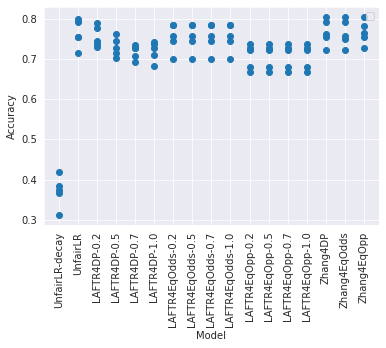

In [52]:
plt.plot()
plt.ylabel('Accuracy')

plt.scatter(model_names, model_accs)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Demographic Disparities

In [53]:
model_dps = unfair['dp'].to_list()+laftr['dp'].to_list()+zhang['dp'].to_list()

No handles with labels found to put in legend.


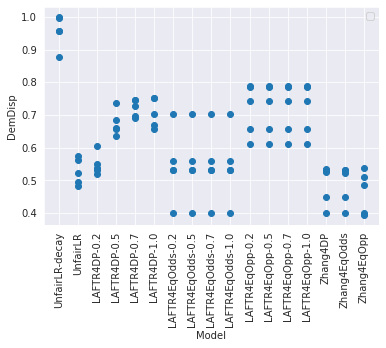

In [54]:
plt.plot()
plt.ylabel('DemDisp')

plt.scatter(model_names, model_dps)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Disparity in Equal Odds

No handles with labels found to put in legend.


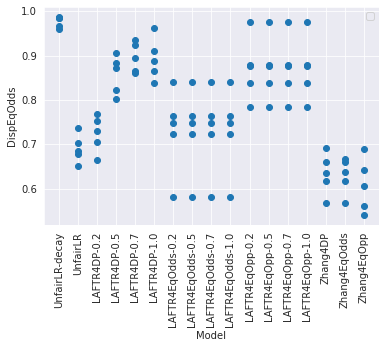

In [55]:
model_deqodds = unfair['deqodds'].to_list()+laftr['deqodds'].to_list()+zhang['deqodds'].to_list()
plt.plot()
plt.ylabel('DispEqOdds')

plt.scatter(model_names, model_deqodds)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Disparity in Equal Opp

No handles with labels found to put in legend.


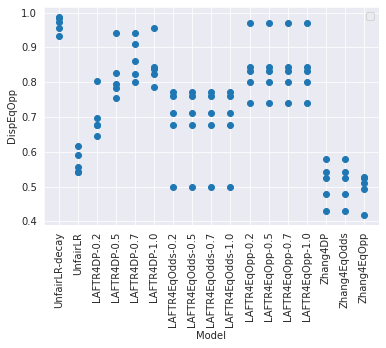

In [56]:
model_deqopps = unfair['deqopp'].to_list()+laftr['deqopp'].to_list()+zhang['deqopp'].to_list()
plt.plot()
plt.ylabel('DispEqOpp')

plt.scatter(model_names, model_deqopps)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Trade-off Acc-DemDisp

No handles with labels found to put in legend.


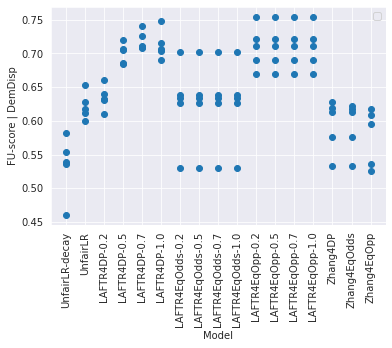

In [57]:
model_trade_dp = unfair['trade_dp'].to_list()+laftr['trade_dp'].to_list()+zhang['trade_dp'].to_list()
plt.plot()
plt.ylabel('FU-score | DemDisp')

plt.scatter(model_names, model_trade_dp)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Trade-off Acc-DispEqOdds

No handles with labels found to put in legend.


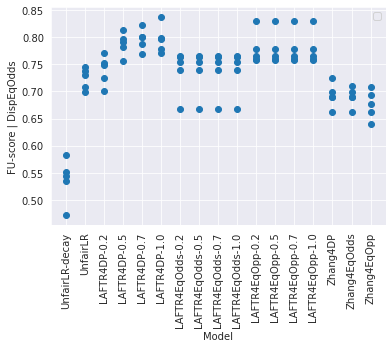

In [58]:
model_trade_deqodds = unfair['trade_deqodds'].to_list()+laftr['trade_deqodds'].to_list()+zhang['trade_deqodds'].to_list()
plt.plot()
plt.ylabel('FU-score | DispEqOdds')

plt.scatter(model_names, model_trade_deqodds)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Trade-off Acc-DispEqOpp

No handles with labels found to put in legend.


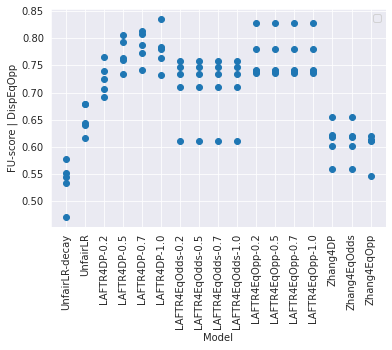

In [59]:
model_trade_deqopp = unfair['trade_deqopp'].to_list()+laftr['trade_deqopp'].to_list()+zhang['trade_deqopp'].to_list()
plt.plot()
plt.ylabel('FU-score | DispEqOpp')

plt.scatter(model_names, model_trade_deqopp)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Acc x DemDisp

In [60]:
'''cmap=sns.light_palette("seagreen")#,as_cmap=True)
cmap'''

'cmap=sns.light_palette("seagreen")#,as_cmap=True)\ncmap'

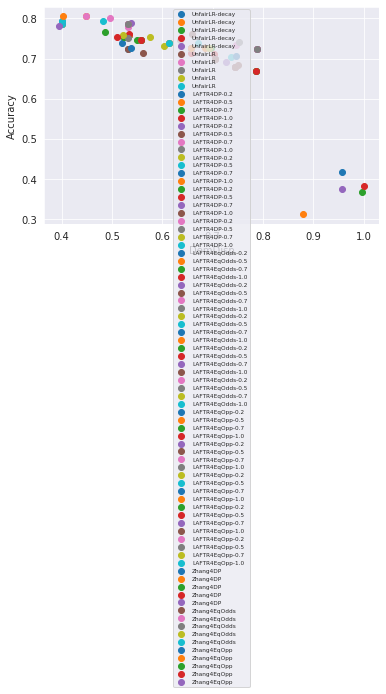

<Figure size 504x504 with 0 Axes>

In [61]:
plt.plot()
#sns.light_palette("seagreen",as_cmap=True)

#fig, ax = plt.scatter(model_dps, model_accs)#, label = "ZHANG DemPar")
'''fig, ax = plt.subplots()
ax.scatter(model_dps, model_accs)'''

plt.xlabel('DemDisp')
plt.ylabel('Accuracy')

for i, model_name in enumerate(model_names):
    plt.scatter(model_dps[i], model_accs[i], label=model_name)#, color=cmap[i])
plt.legend(loc='upper center', fontsize='xx-small')
plt.figure(figsize=(7,7))

plt.show()

## Plotting Acc x DispEqOdds

## Plotting Acc x DispEqOpp

# Pro artigo

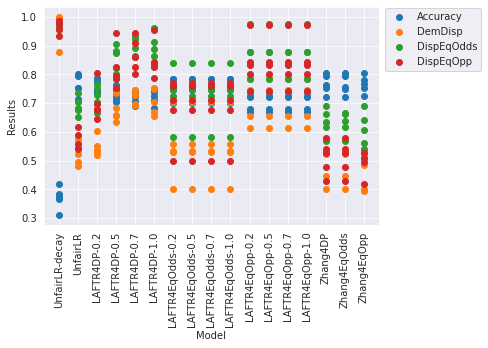

In [62]:

plt.plot()
plt.ylabel('Results')

plt.scatter(model_names, model_accs)
plt.scatter(model_names, model_dps)
plt.scatter(model_names, model_deqodds)
plt.scatter(model_names, model_deqopps)#, label = "ZHANG DemPar")


plt.xlabel('Model')
plt.xticks(rotation=90)
#plt.figure(figsize=(15,12))
#plt.yticks(range(0.755, 0.985))
#plt.yscale('log')
#plt.yticks([0.755, 0.80, 0.805, 0.81, 0.815, 0.82, 0.825, 0.83, 0.835, 0.84, 0.845, 0.85, 0.855, 0.86, 0.865, 0.87, 0.875, 0.88, 0.885, 0.89, 0.895, 0.90, 0.905, 0.91, 0.915, 0.92, 0.925, 0.93, 0.935, 0.94, 0.945, 0.95, 0.955, 0.96, 0.965, 0.97, 0.975,0.98, 0.985])
plt.legend(['Accuracy', 'DemDisp', 'DispEqOdds', 'DispEqOpp'], bbox_to_anchor=(1.32,1.02), loc="upper right")
plt.show()

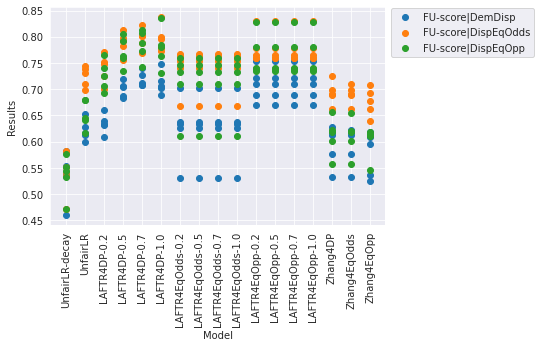

In [63]:

plt.plot()
plt.ylabel('Results')

plt.scatter(model_names, model_trade_dp)
plt.scatter(model_names, model_trade_deqodds)
plt.scatter(model_names, model_trade_deqopp)#, label = "ZHANG DemPar")


plt.xlabel('Model')
plt.xticks(rotation=90)
#plt.figure(figsize=(15,12))
#plt.yticks(range(0.755, 0.985))
#plt.yscale('log')
#plt.yticks([0.755, 0.80, 0.805, 0.81, 0.815, 0.82, 0.825, 0.83, 0.835, 0.84, 0.845, 0.85, 0.855, 0.86, 0.865, 0.87, 0.875, 0.88, 0.885, 0.89, 0.895, 0.90, 0.905, 0.91, 0.915, 0.92, 0.925, 0.93, 0.935, 0.94, 0.945, 0.95, 0.955, 0.96, 0.965, 0.97, 0.975,0.98, 0.985])
plt.legend(['FU-score|DemDisp', 'FU-score|DispEqOdds', 'FU-score|DispEqOpp'], bbox_to_anchor=(1.46,1.02), loc="upper right")
plt.show()